In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
count = CountVectorizer()
data = pd.read_csv('Train.csv')
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


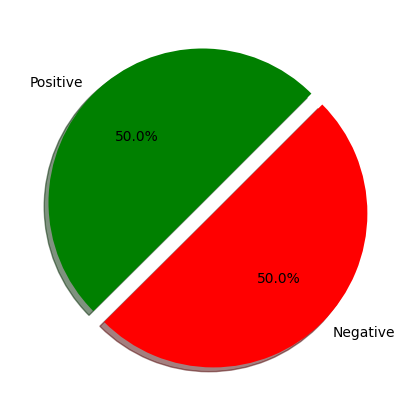

In [4]:
fig = plt.figure(figsize=(5,5))
colors = ["green", "red"]
pos=data[data['label']==1]
neg=data[data['label']==0]
ck=[pos['label'].count(),neg['label'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 45,
                 explode=(0, 0.1))

In [5]:
import re
def preprocessor(text):
             text=re.sub('<[^>]*>','',text)
             emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
             text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emojis).replace('-','')
             return text   
data['text']=data['text'].apply(preprocessor)

<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:4: SyntaxWarning: invalid escape sequence '\)'
<>:5: SyntaxWarning: invalid escape sequence '\W'
/tmp/ipykernel_48842/3796598529.py:4: SyntaxWarning: invalid escape sequence '\)'
  emojis=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
/tmp/ipykernel_48842/3796598529.py:5: SyntaxWarning: invalid escape sequence '\W'
  text=re.sub('[\W]+',' ',text.lower()) +\


In [6]:
from nltk.stem.porter import PorterStemmer
porter=PorterStemmer()
def tokenizer(text):
        return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

[nltk_data] Downloading package stopwords to /home/artam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Positive words are as follows


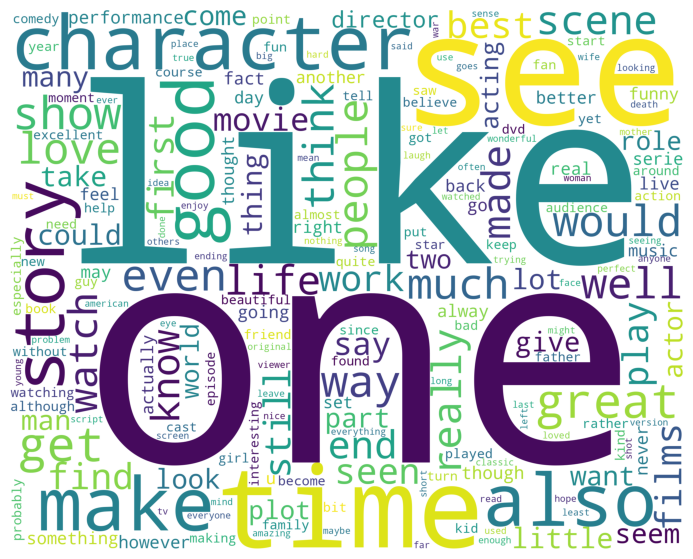

Negative words are as follows


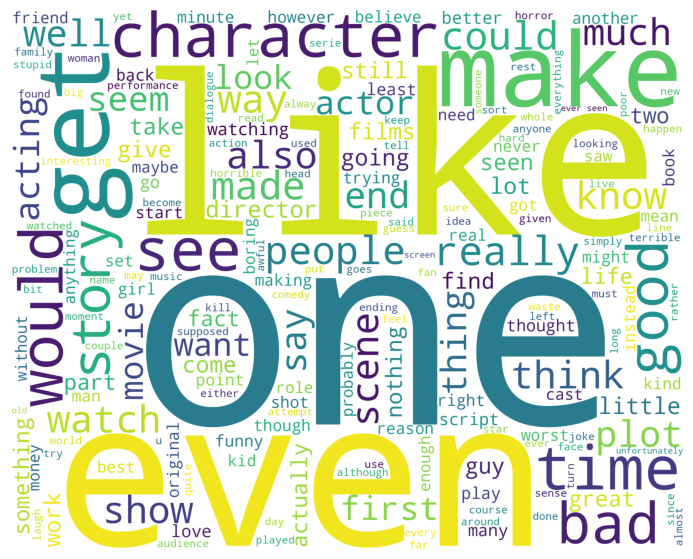

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop=stopwords.words('english')

from wordcloud import WordCloud
positivedata = data[ data['label'] == 1]
positivedata =positivedata['text']
negdata = data[data['label'] == 0]
negdata= negdata['text']

def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                              if(word!='movie' and word!='film')
                            ])
    wordcloud = WordCloud(stopwords=stop,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(10, 7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words are as follows")
wordcloud_draw(positivedata,'white')
print("Negative words are as follows")
wordcloud_draw(negdata)